# Özellik çıkarımı ve ters görsel arama


# Veri kümesi hazırlama

In [48]:
import os
import keras
from keras.applications.imagenet_utils import decode_predictions, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import random
import time

In [49]:
model = keras.applications.VGG16(weights='imagenet',include_top=True)

In [50]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

# Görüntüyü ağ üzerinden iletme

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def load_image(path):
  img = image.load_img(path,target_size=model.input_shape[1:3])
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)
  x = preprocess_input(x)
  return img,x

Veri setimizden bir görüntüyü veri dizinine yükleyeceğiz ve veri vektörüne bir göz atacağız.


shape of x:  (1, 224, 224, 3)
data type:  float32


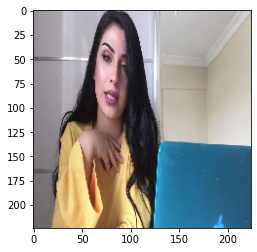

In [52]:
img,x = load_image("veri-setleri/model6/videoplayback_7 093.jpg")
print("shape of x: ",x.shape)
print("data type: ",x.dtype)
plt.imshow(img)

In [53]:
# forward the image through the network
predictions = model.predict(x)
# print(predictions)
for _, pred,prob in decode_predictions(predictions)[0]:
  print("predicted %s with probability %0.3f" %(pred,prob))

predicted cloak with probability 0.324
predicted shower_curtain with probability 0.135
predicted velvet with probability 0.073
predicted miniskirt with probability 0.056
predicted bath_towel with probability 0.033


# Özellik çıkarımı

In [54]:
feat_extractor = Model(inputs=model.input,outputs=model.get_layer("fc2").output)
feat_extractor.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

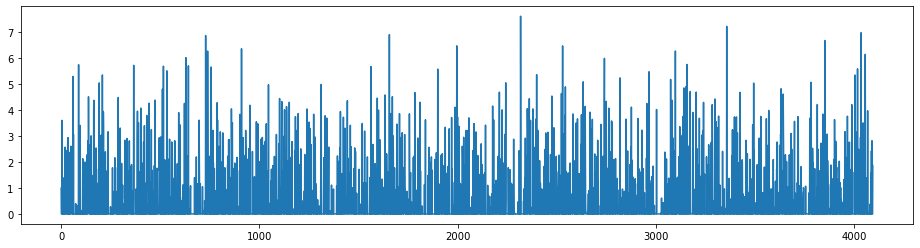

In [55]:
img,x = load_image("veri-setleri/model6/videoplayback_7 093.jpg")
feat = feat_extractor.predict(x)
plt.figure(figsize=(16,4))
plt.plot(feat[0])


In [56]:
images_path = 'veri-setleri'
image_extensions=['.jpg','.png','.jpeg']# case-insensitive (upper/lower doesn't matter)
max_num_images = 10000 #keep the number less than 30 if running on cpu for faster results
tick = time.time()
# dp has the root directory,dn has the sub directories and filenames has the file name

images = [os.path.join(dp,f) for dp,dn,filenames in os.walk(images_path) for f in filenames if os.path.splitext(f)[1].lower() in image_extensions]
if max_num_images<len(images):
  #get random images from the image paths
  images = [images[i] for i in sorted(random.sample(range(len(images)),max_num_images))] #comment this and uncomment the below line if running on cpu to get better matches
#   images = images[0:max_num_images]
print("keeping %d images to analyze" %len(images))

keeping 2735 images to analyze


In [57]:

tic = time.time()
features = []
for i, image_path in enumerate(images):
  if i%10 == 0:
    toc = time.time()
    elap = toc-tic;
    print("analyzing image %d / %d. Time taken : %4.4f seconds"%(i,len(images),elap))
    tic= time.time()
  img,x = load_image(image_path)
  feat = feat_extractor.predict(x)[0]
  features.append(feat)
print('finished extracting features for %d images' % len(images))

analyzing image 0 / 2735. Time taken : 0.0040 seconds
analyzing image 10 / 2735. Time taken : 3.2016 seconds
analyzing image 20 / 2735. Time taken : 3.8036 seconds
analyzing image 30 / 2735. Time taken : 4.4731 seconds
analyzing image 40 / 2735. Time taken : 3.5951 seconds
analyzing image 50 / 2735. Time taken : 3.9403 seconds
analyzing image 60 / 2735. Time taken : 3.7667 seconds
analyzing image 70 / 2735. Time taken : 3.6059 seconds
analyzing image 80 / 2735. Time taken : 5.1761 seconds
analyzing image 90 / 2735. Time taken : 4.4139 seconds
analyzing image 100 / 2735. Time taken : 2.8209 seconds
analyzing image 110 / 2735. Time taken : 3.9698 seconds
analyzing image 120 / 2735. Time taken : 3.2900 seconds
analyzing image 130 / 2735. Time taken : 2.9720 seconds
analyzing image 140 / 2735. Time taken : 3.7160 seconds
analyzing image 150 / 2735. Time taken : 4.1404 seconds
analyzing image 160 / 2735. Time taken : 3.1437 seconds
analyzing image 170 / 2735. Time taken : 3.0654 seconds
ana

analyzing image 1460 / 2735. Time taken : 3.4923 seconds
analyzing image 1470 / 2735. Time taken : 2.6159 seconds
analyzing image 1480 / 2735. Time taken : 2.9426 seconds
analyzing image 1490 / 2735. Time taken : 3.2316 seconds
analyzing image 1500 / 2735. Time taken : 2.8904 seconds
analyzing image 1510 / 2735. Time taken : 3.0981 seconds
analyzing image 1520 / 2735. Time taken : 2.7780 seconds
analyzing image 1530 / 2735. Time taken : 3.0170 seconds
analyzing image 1540 / 2735. Time taken : 2.7895 seconds
analyzing image 1550 / 2735. Time taken : 3.6127 seconds
analyzing image 1560 / 2735. Time taken : 2.8886 seconds
analyzing image 1570 / 2735. Time taken : 2.8628 seconds
analyzing image 1580 / 2735. Time taken : 3.0101 seconds
analyzing image 1590 / 2735. Time taken : 2.8357 seconds
analyzing image 1600 / 2735. Time taken : 2.9427 seconds
analyzing image 1610 / 2735. Time taken : 2.6904 seconds
analyzing image 1620 / 2735. Time taken : 2.6787 seconds
analyzing image 1630 / 2735. Ti

In [58]:
from sklearn.decomposition import PCA

features = np.array(features)
pca = PCA(n_components=300)
pca.fit(features)

PCA(n_components=300)

In [59]:
from scipy.spatial import distance

def get_closest_images(query_image_idx, num_results=5):
    distances = [ distance.cosine(pca_features[query_image_idx], feat) for feat in pca_features ]
    idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[1:num_results+1]
    return idx_closest

In [60]:
pca_features = pca.transform(features)


In [61]:
def get_concatenated_images(indexes, thumb_height):
    thumbs = []# load all the similarity results as thumbnails of height 100

    for idx in indexes:
        img = image.load_img(images[idx])
        img = img.resize((int(img.width * thumb_height / img.height), thumb_height))
        thumbs.append(img)
        
        # concatenate the images into a single image
    concat_image = np.concatenate([np.asarray(t) for t in thumbs], axis=1)
    return concat_image

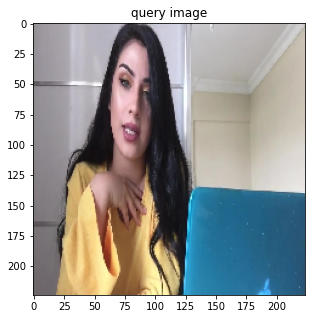

In [62]:


# load image and extract features
new_image, x = load_image('veri-setleri/model6/videoplayback_7 093.jpg')
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.title("query image")
plt.imshow(new_image)

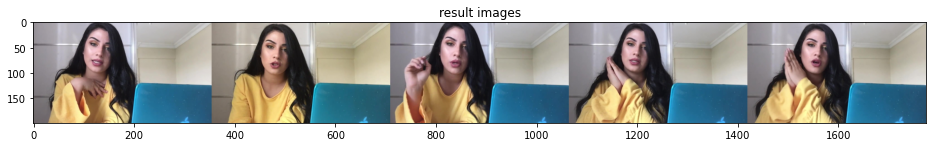

In [63]:
# display the resulting images
plt.figure(figsize = (16,12))
plt.title("result images")
plt.imshow(results_image)

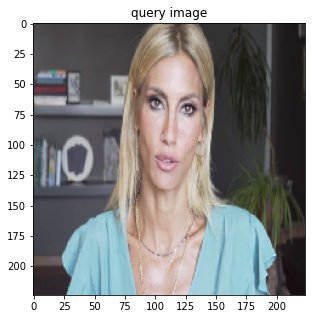

In [68]:
#We will try it with a visual that is not in the dataset.


# load image and extract features
new_image, x = load_image('veri-setleri/deneme/çağla-şikel.jpg')
new_features = feat_extractor.predict(x)

# project it into pca space
new_pca_features = pca.transform(new_features)[0]

# calculate its distance to all the other images pca feature vectors
distances = [ distance.cosine(new_pca_features, feat) for feat in pca_features ]
idx_closest = sorted(range(len(distances)), key=lambda k: distances[k])[0:5]  # grab first 5
results_image = get_concatenated_images(idx_closest, 200)

# display the results
plt.figure(figsize = (5,5))
plt.title("query image")
plt.imshow(new_image)

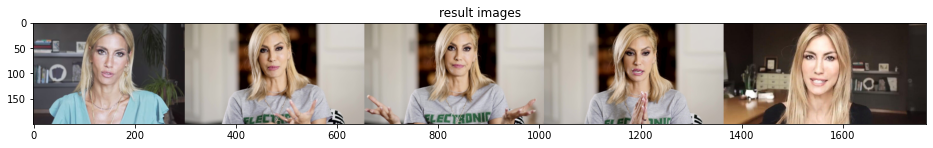

In [69]:
# display the resulting images
plt.figure(figsize = (16,12))
plt.title("result images")
plt.imshow(results_image)

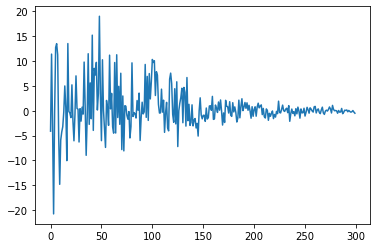

In [70]:
plt.plot(pca_features[2])

In [67]:
tock = time.time()
print(tock-tick)

846.8943147659302
